In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

In [45]:
companies = pd.read_csv("/Users/talhajamal/Desktop/Code/Python_Projects/Mathematical_Modelling/src/Marshall Wace/Data Exam/companies.csv")

In [46]:
companies.head()

,ticker,company,country,industry
0,1,Prologue,France,Software
1,2,Ekinops SAS,France,Technology Hardware Equipment
2,3,Neuf Cegetel SA,France,Telecommunication
3,4,Societe pour l'Informatique Industrielle,France,Software
4,5,ALTI,France,Software


## Q1: What %age of companies are involved in Life Sciences?

In [47]:
companies.describe()

,ticker
count,500.000000
mean,250.500000
std,144.481833
min,1.000000
25%,125.750000
50%,250.500000
75%,375.250000
max,500.000000


In [48]:
life_sciences_companies = companies[companies['industry'] == 'Life Sciences']
len(life_sciences_companies)

57

In [49]:
len(life_sciences_companies)
print(f"Percentage of companies involved in Life Sciences Industry : {round((len(life_sciences_companies) / len(companies)) * 100, 2)}")

Percentage of companies involved in Life Sciences Industry : 11.4


## Q2: How would you describe the distribution of Market Caps?
## multi choice: leptokurtic/uniform/log normal/positive or negative skew

In [57]:
market_cap = pd.read_csv("/Users/talhajamal/Desktop/Code/Python_Projects/Mathematical_Modelling/src/Marshall Wace/Data Exam/cap.csv")

In [58]:
market_cap.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,1.769477e+07,1.756440e+08,8.605285e+09,6.240192e+08,9.295349e+07,6.376725e+07,1.509716e+08,7.029106e+07,1.046523e+09,...,3.407262e+08,4.066219e+07,1.014566e+09,2.559483e+09,3.217560e+09,3.992439e+10,4.222795e+10,3.804590e+09,4.607054e+08,6.057107e+09
1,2020-01-02,1.802682e+07,1.636031e+08,8.784352e+09,6.363901e+08,8.865229e+07,6.282470e+07,1.515202e+08,6.904994e+07,1.026802e+09,...,3.430948e+08,4.096476e+07,1.015657e+09,2.559116e+09,3.172254e+09,4.041044e+10,4.242771e+10,3.799394e+09,4.559963e+08,6.015714e+09
2,2020-01-03,1.845211e+07,1.648883e+08,8.755067e+09,5.984640e+08,8.882021e+07,6.149500e+07,1.517055e+08,6.800646e+07,1.040314e+09,...,3.410874e+08,4.057799e+07,1.009019e+09,2.584947e+09,3.142615e+09,3.961840e+10,4.147472e+10,3.851076e+09,4.442952e+08,5.897544e+09
3,2020-01-06,1.832624e+07,1.635899e+08,8.378197e+09,6.002769e+08,8.932168e+07,6.217946e+07,1.502546e+08,6.849484e+07,1.026898e+09,...,3.346374e+08,3.990483e+07,1.017195e+09,2.543380e+09,3.128046e+09,4.048003e+10,4.147827e+10,3.818204e+09,4.477840e+08,5.999464e+09
4,2020-01-07,1.832745e+07,1.629636e+08,8.670112e+09,5.902407e+08,8.928384e+07,6.310960e+07,1.493567e+08,6.857253e+07,1.029184e+09,...,3.305260e+08,4.055694e+07,1.000582e+09,2.585363e+09,3.150836e+09,4.099914e+10,4.255871e+10,3.466159e+09,4.569877e+08,5.956736e+09


In [59]:
market_cap.tail()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
518,2021-12-27,1.324353e+07,3.547144e+08,1.506420e+10,7.825531e+08,1.049190e+08,5.200610e+07,1.899871e+08,3.902282e+07,6.336305e+08,...,2.488120e+08,7.958993e+07,1.479414e+09,9.762362e+08,3.046661e+09,2.616896e+10,3.753571e+10,2.306088e+09,2.444805e+08,1.067869e+10
519,2021-12-28,1.334993e+07,3.607217e+08,1.497270e+10,7.803757e+08,1.066530e+08,5.228665e+07,1.925315e+08,3.939920e+07,6.456131e+08,...,2.398894e+08,7.996256e+07,1.511557e+09,9.640496e+08,3.029961e+09,2.547564e+10,3.670777e+10,2.299834e+09,2.436930e+08,1.101451e+10
520,2021-12-29,1.332127e+07,3.610060e+08,1.505007e+10,7.803604e+08,1.081830e+08,6.141133e+07,2.018909e+08,3.884587e+07,6.463873e+08,...,2.427423e+08,8.115262e+07,1.511799e+09,9.667531e+08,3.019906e+09,2.556863e+10,3.756218e+10,2.317906e+09,2.454344e+08,1.091471e+10
521,2021-12-30,1.342294e+07,3.615340e+08,1.518810e+10,7.832827e+08,1.076901e+08,6.119814e+07,1.998994e+08,3.841295e+07,6.571827e+08,...,2.405180e+08,7.900270e+07,1.498068e+09,9.603614e+08,3.055377e+09,2.582705e+10,3.727394e+10,2.344136e+09,2.458987e+08,1.076866e+10
522,2021-12-31,1.314514e+07,3.630138e+08,1.523300e+10,7.721869e+08,1.095411e+08,6.120849e+07,2.065455e+08,3.900596e+07,6.608783e+08,...,2.412674e+08,7.980600e+07,1.513537e+09,9.524207e+08,3.015678e+09,2.521594e+10,3.704618e+10,2.378382e+09,2.459079e+08,1.106742e+10


In [60]:
market_cap.describe()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,...,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02
mean,1.330090e+07,2.995783e+08,1.041220e+10,5.932943e+08,1.031812e+08,4.604066e+07,1.638863e+08,5.870017e+07,9.373454e+08,5.313058e+09,...,2.995141e+08,5.252845e+07,1.125503e+09,1.351975e+09,3.438918e+09,2.880097e+10,3.949535e+10,2.986707e+09,3.396936e+08,7.886837e+09
std,2.639117e+06,8.279217e+07,2.163699e+09,1.079775e+08,1.170992e+07,6.089827e+06,2.025638e+07,9.602732e+06,1.767662e+08,6.714708e+08,...,2.893512e+07,1.169471e+07,1.331908e+08,4.388137e+08,3.588209e+08,5.926576e+09,3.065947e+09,5.589997e+08,6.612843e+07,1.531352e+09
min,9.979021e+06,1.608328e+08,6.800356e+09,4.234486e+08,7.878514e+07,3.689526e+07,1.180810e+08,3.841295e+07,5.793679e+08,3.783898e+09,...,2.364505e+08,3.342217e+07,8.876233e+08,9.003392e+08,2.591024e+09,1.929210e+10,3.358255e+10,1.917288e+09,2.094366e+08,5.618860e+09
25%,1.121663e+07,2.049462e+08,8.414572e+09,5.031830e+08,9.486162e+07,4.135678e+07,1.497181e+08,5.130566e+07,8.336920e+08,4.964763e+09,...,2.822608e+08,4.351634e+07,1.029592e+09,1.126620e+09,3.129425e+09,2.474274e+10,3.736990e+10,2.560404e+09,2.929290e+08,6.329649e+09
50%,1.252413e+07,3.375165e+08,1.018678e+10,5.625487e+08,1.008770e+08,4.444586e+07,1.672559e+08,6.087565e+07,9.394465e+08,5.329651e+09,...,3.018242e+08,4.781749e+07,1.099018e+09,1.214474e+09,3.418270e+09,2.643067e+10,3.889865e+10,3.149599e+09,3.444996e+08,7.982418e+09
75%,1.402665e+07,3.667588e+08,1.239591e+10,7.066303e+08,1.076922e+08,4.944091e+07,1.784934e+08,6.639765e+07,1.077415e+09,5.831197e+09,...,3.194787e+08,5.980223e+07,1.192290e+09,1.325366e+09,3.754274e+09,3.263689e+10,4.131109e+10,3.380681e+09,3.744260e+08,9.293901e+09
max,2.000803e+07,4.258949e+08,1.523300e+10,8.167460e+08,1.357709e+08,6.670460e+07,2.083169e+08,7.715440e+07,1.315477e+09,6.725999e+09,...,3.732590e+08,8.115262e+07,1.513537e+09,2.585363e+09,4.294326e+09,4.369416e+10,4.795143e+10,4.168056e+09,4.991077e+08,1.106742e+10


In [61]:
market_cap.columns = market_cap.columns.str.replace(' ', '')

In [62]:
from scipy.stats import skew, kurtosis, shapiro

In [63]:
tot_skew = 0
for num in range(1, 501):
    col = str(num)
    sample_mcap = market_cap[col]
    sample_skew = skew(sample_mcap)
    tot_skew += sample_skew
avg_skew = tot_skew / 500
avg_skew

0.3430470199946965

In [64]:
tot_kurt = 0
for num in range(1, 501):
    col = str(num)
    sample_mcap = market_cap[col]
    sample_kurt = kurtosis(sample_mcap, fisher=True)
    tot_kurt += sample_kurt
avg_kurt = tot_kurt / 501
avg_kurt

-0.4109283570895769

0.3958692350382391

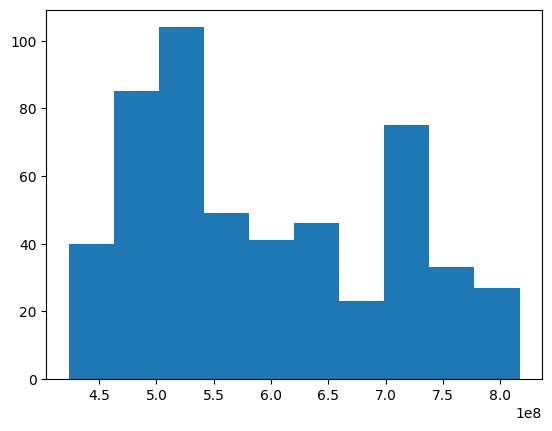

In [65]:
plt.hist(market_cap['4']);
kurtosis(market_cap['4'], fisher=True)
skew(market_cap['4'])

In [542]:
# From Excel:
# Average Skewness: 0.342587948 -> Positive Skew
# Average Kurtosis: -0.404153302 -> Less than 0 means Platykurtic / More than 0 means Leptokurtic
# Since Market Caps are positive, generally these distributions are LogNormally distributed
# LogNormal distributions are also generally positively skewed and leptokurtic

## Q3:  On which one of these days was there the highest standard deviation: 2020-03-23, 2020-03-30, 2020-11-18, 2020-11-25, 2021-01-04

In [85]:
returns = pd.read_csv("/Users/talhajamal/Desktop/Code/Python_Projects/Mathematical_Modelling/src/Marshall Wace/Data Exam/ret.csv")

In [86]:
returns.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
1,2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2,2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644
3,2020-01-06,-0.006822,-0.007874,-0.043046,0.003029,0.005646,0.011130,-0.009564,0.007181,-0.012896,...,-0.018910,-0.016589,0.008103,-0.016080,-0.004636,0.021748,0.000086,-0.008536,0.007852,0.017282
4,2020-01-07,0.000066,-0.003828,0.034842,-0.016719,-0.000424,0.014959,-0.005975,0.001134,0.002226,...,-0.012286,0.016342,-0.016332,0.016506,0.007286,0.012824,0.026048,-0.092202,0.020554,-0.007122


In [87]:
returns.describe()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.000364,0.001560,0.001306,0.000607,0.000631,0.000190,0.000869,-0.000938,-0.000653,0.000311,...,-0.000457,0.001564,0.001047,-0.001577,0.000073,-0.000648,-0.000030,-0.000664,-0.001012,0.001337
std,0.021038,0.020396,0.019926,0.022922,0.024053,0.022834,0.019484,0.020399,0.020359,0.020097,...,0.020742,0.022240,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
min,-0.164478,-0.068553,-0.067160,-0.180142,-0.183143,-0.167871,-0.124366,-0.109512,-0.086783,-0.143181,...,-0.132112,-0.115655,-0.075925,-0.163037,-0.149620,-0.094602,-0.113283,-0.099188,-0.107835,-0.098935
25%,-0.009625,-0.009278,-0.009841,-0.009748,-0.010842,-0.010005,-0.009499,-0.011403,-0.011624,-0.011158,...,-0.010948,-0.009038,-0.009042,-0.011969,-0.010345,-0.011462,-0.010716,-0.010377,-0.010601,-0.008892
50%,-0.000082,0.001462,0.000830,0.000421,0.000986,-0.000223,0.000840,-0.000713,-0.000969,0.001819,...,-0.000366,0.002503,-0.001250,-0.001259,0.000299,0.001012,-0.000129,0.000517,-0.000327,0.001989
75%,0.009002,0.011736,0.011193,0.011034,0.011132,0.009894,0.011480,0.009885,0.009516,0.011100,...,0.008125,0.012490,0.010282,0.010013,0.010720,0.010077,0.010235,0.010457,0.009857,0.012988
max,0.106867,0.128787,0.136027,0.208867,0.216330,0.174513,0.082216,0.137481,0.093766,0.093086,...,0.119125,0.120581,0.119215,0.163216,0.086538,0.080023,0.091295,0.119889,0.103835,0.094517


In [93]:
returns.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
1,2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2,2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644
3,2020-01-06,-0.006822,-0.007874,-0.043046,0.003029,0.005646,0.011130,-0.009564,0.007181,-0.012896,...,-0.018910,-0.016589,0.008103,-0.016080,-0.004636,0.021748,0.000086,-0.008536,0.007852,0.017282
4,2020-01-07,0.000066,-0.003828,0.034842,-0.016719,-0.000424,0.014959,-0.005975,0.001134,0.002226,...,-0.012286,0.016342,-0.016332,0.016506,0.007286,0.012824,0.026048,-0.092202,0.020554,-0.007122


In [94]:
returns  = returns.set_index('Dates', drop=True)
returns.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,-0.016683,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,0.028491,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,0.025626,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644
2020-01-06,-0.006822,-0.007874,-0.043046,0.003029,0.005646,0.011130,-0.009564,0.007181,-0.012896,-0.008368,...,-0.018910,-0.016589,0.008103,-0.016080,-0.004636,0.021748,0.000086,-0.008536,0.007852,0.017282
2020-01-07,0.000066,-0.003828,0.034842,-0.016719,-0.000424,0.014959,-0.005975,0.001134,0.002226,-0.009807,...,-0.012286,0.016342,-0.016332,0.016506,0.007286,0.012824,0.026048,-0.092202,0.020554,-0.007122


In [95]:
daily_std = returns.std(axis = 1)

In [96]:
daily_std.head()

Dates
2020-01-01    0.018602
2020-01-02    0.018589
2020-01-03    0.018074
2020-01-06    0.017802
2020-01-07    0.020034
dtype: float64

In [97]:
daily_std.idxmax()

'2020-03-30'

In [ ]:
dates = ['2020-03-23', '2020-03-30', '2020-11-18', '2020-11-25', '2021-01-04']

In [552]:
returns.columns = returns.columns.str.replace(' ', '')
ret_cols = returns.columns[1:]
ret_cols

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=500)

## Q4. Find the ticker of the french company with the lowest standard deviation of returns.

In [98]:
french_firms = companies[companies['country'] == 'France']

In [99]:
returns.columns = returns.columns.str.replace(' ', '')
returns.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '491', '492', '493', '494', '495', '496', '497', '498', '499', '500'],
      dtype='object', length=500)

In [100]:
french_firms.head()

,ticker,company,country,industry
0,1,Prologue,France,Software
1,2,Ekinops SAS,France,Technology Hardware Equipment
2,3,Neuf Cegetel SA,France,Telecommunication
3,4,Societe pour l'Informatique Industrielle,France,Software
4,5,ALTI,France,Software


In [102]:
ret_desc = returns.describe()
ret_desc.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.000364,0.001560,0.001306,0.000607,0.000631,0.000190,0.000869,-0.000938,-0.000653,0.000311,...,-0.000457,0.001564,0.001047,-0.001577,0.000073,-0.000648,-0.000030,-0.000664,-0.001012,0.001337
std,0.021038,0.020396,0.019926,0.022922,0.024053,0.022834,0.019484,0.020399,0.020359,0.020097,...,0.020742,0.022240,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
min,-0.164478,-0.068553,-0.067160,-0.180142,-0.183143,-0.167871,-0.124366,-0.109512,-0.086783,-0.143181,...,-0.132112,-0.115655,-0.075925,-0.163037,-0.149620,-0.094602,-0.113283,-0.099188,-0.107835,-0.098935
25%,-0.009625,-0.009278,-0.009841,-0.009748,-0.010842,-0.010005,-0.009499,-0.011403,-0.011624,-0.011158,...,-0.010948,-0.009038,-0.009042,-0.011969,-0.010345,-0.011462,-0.010716,-0.010377,-0.010601,-0.008892


In [103]:
ret_desc.columns = ret_desc.columns.str.replace(' ', '')
ret_desc

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,-0.000364,0.001560,0.001306,0.000607,0.000631,0.000190,0.000869,-0.000938,-0.000653,0.000311,...,-0.000457,0.001564,0.001047,-0.001577,0.000073,-0.000648,-0.000030,-0.000664,-0.001012,0.001337
std,0.021038,0.020396,0.019926,0.022922,0.024053,0.022834,0.019484,0.020399,0.020359,0.020097,...,0.020742,0.022240,0.019326,0.021754,0.020722,0.020361,0.018656,0.021828,0.019791,0.020872
min,-0.164478,-0.068553,-0.067160,-0.180142,-0.183143,-0.167871,-0.124366,-0.109512,-0.086783,-0.143181,...,-0.132112,-0.115655,-0.075925,-0.163037,-0.149620,-0.094602,-0.113283,-0.099188,-0.107835,-0.098935
25%,-0.009625,-0.009278,-0.009841,-0.009748,-0.010842,-0.010005,-0.009499,-0.011403,-0.011624,-0.011158,...,-0.010948,-0.009038,-0.009042,-0.011969,-0.010345,-0.011462,-0.010716,-0.010377,-0.010601,-0.008892
50%,-0.000082,0.001462,0.000830,0.000421,0.000986,-0.000223,0.000840,-0.000713,-0.000969,0.001819,...,-0.000366,0.002503,-0.001250,-0.001259,0.000299,0.001012,-0.000129,0.000517,-0.000327,0.001989
75%,0.009002,0.011736,0.011193,0.011034,0.011132,0.009894,0.011480,0.009885,0.009516,0.011100,...,0.008125,0.012490,0.010282,0.010013,0.010720,0.010077,0.010235,0.010457,0.009857,0.012988
max,0.106867,0.128787,0.136027,0.208867,0.216330,0.174513,0.082216,0.137481,0.093766,0.093086,...,0.119125,0.120581,0.119215,0.163216,0.086538,0.080023,0.091295,0.119889,0.103835,0.094517


In [105]:
min_std = float('infinity')
for tic in french_firms['ticker']:
    curr_std_dev = ret_desc.loc['std',str(tic)]
    if curr_std_dev <= min_std:
        min_std = curr_std_dev
        min_ticker = tic
min_ticker   

15

In [107]:
minimum_std = float('infinity')
for tic in french_firms['ticker']:
    std_dev = returns[str(tic)].std()
    if std_dev <= minimum_std:
        minimum_std = std_dev
        min_tic = tic

min_tic

15

## Q5: Which company has a data quality issue? Find it, and remove it from the dataset. (I had one with a constant return, ticker = '201', look through these using standard deviations)

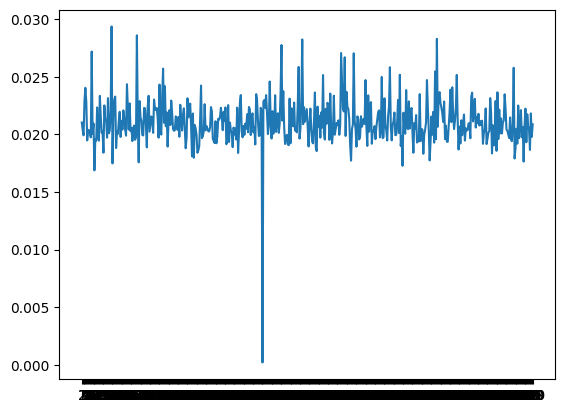

In [110]:
ret_desc = returns.describe()
std_ret = ret_desc.loc['std']
plt.plot(std_ret)

In [111]:
std_ret.idxmin()

'201'

In [112]:
min(std_ret)

0.00019433089655262854

In [113]:
returns = returns.drop('201', axis = 1)

In [114]:
try:
    returns['201']
except:
    print("Column not present")

Column not present


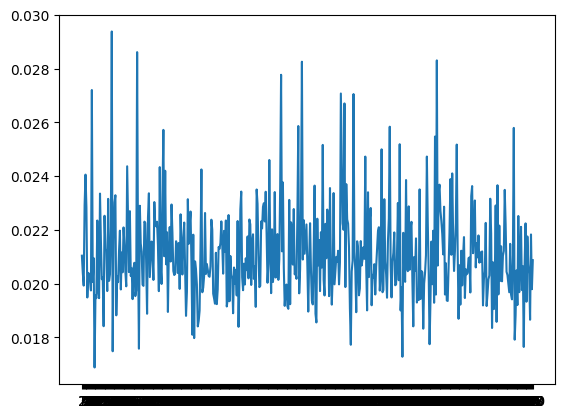

In [115]:
ret_desc = returns.describe()
std_ret = ret_desc.loc['std']
plt.plot(std_ret)

## Q6. How many companies had a positive return after the first vaccine was announced?

In [129]:
vaccines = pd.read_csv('/Users/talhajamal/Desktop/Code/Python_Projects/Mathematical_Modelling/src/Marshall Wace/Data Exam/vaccines.csv')
vaccines

,name,sponsor,study,resultsDate
0,Oxford-AstraZeneca COVID-19 vaccine (Vaxzevria...,"University of Oxford, AstraZeneca, CEPI","Phase III (30,000) Interventional; randomized,...",2020-12-08
1,Pfizer-BioNTech COVID-19 vaccine (Comirnaty),"BioNTech, Pfizer","Phase III (43,998) Randomized, placebo-control...",2020-11-18
2,Janssen COVID-19 vaccine,"Janssen Vaccines (Johnson & Johnson), BIDMC","Phase III (40,000) Randomized, double-blinded,...",2021-01-29
3,Moderna COVID-19 vaccine (Spikevax),"Moderna, NIAID, BARDA, CEPI","Phase III (30,000) Interventional; randomized,...",2020-11-16


In [123]:
vaccines.describe()

,name,sponsor,study,resultsDate
count,4,4,4,4
unique,4,4,4,4
top,Oxford-AstraZeneca COVID-19 vaccine (Vaxzevria...,"University of Oxford, AstraZeneca, CEPI","Phase III (30,000) Interventional; randomized,...",2020-12-08
freq,1,1,1,1


In [124]:
first_vaccine_date = min(vaccines['resultsDate'])
first_vaccine_date

'2020-11-16'

In [125]:
returns.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,-0.016683,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,0.028491,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,0.025626,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644
2020-01-06,-0.006822,-0.007874,-0.043046,0.003029,0.005646,0.011130,-0.009564,0.007181,-0.012896,-0.008368,...,-0.018910,-0.016589,0.008103,-0.016080,-0.004636,0.021748,0.000086,-0.008536,0.007852,0.017282
2020-01-07,0.000066,-0.003828,0.034842,-0.016719,-0.000424,0.014959,-0.005975,0.001134,0.002226,-0.009807,...,-0.012286,0.016342,-0.016332,0.016506,0.007286,0.012824,0.026048,-0.092202,0.020554,-0.007122


In [126]:
next_day_ret = returns.loc['2020-11-17']
next_day_ret

1      0.017965
2      0.058150
3      0.010575
4     -0.016040
5      0.021275
         ...   
496    0.061347
497   -0.029911
498    0.004149
499    0.028918
500    0.041181
Name: 2020-11-17, Length: 499, dtype: float64

In [128]:
pos_count = (next_day_ret > 0).sum()
pos_count

393

## Q7. What was the average cumulative return for each company for the first 3 days after the first vaccine was announced

In [130]:
first_vaccine_date_object = datetime.strptime(first_vaccine_date, "%Y-%m-%d")
first_date = (first_vaccine_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
last_date = (first_vaccine_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(first_date, last_date)

2020-11-17 2020-11-19


In [131]:
sliced_returns = returns.loc[first_date:last_date]
sliced_returns

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-11-17,0.017965,0.058150,0.010575,-0.016040,0.021275,0.035132,0.014430,0.005167,0.026395,0.002646,...,-0.011707,-0.001111,0.019844,-0.029230,0.010392,0.061347,-0.029911,0.004149,0.028918,0.041181
2020-11-18,0.021494,-0.046688,0.011320,0.072605,-0.012109,-0.014833,-0.008484,0.056846,0.016709,0.014172,...,0.027723,0.017564,0.003760,0.042098,0.028305,-0.062045,0.050833,0.026220,0.001756,-0.016230
2020-11-19,-0.006583,-0.047972,-0.049491,0.034978,0.004906,-0.007578,0.016496,-0.023641,-0.001253,-0.038899,...,0.026008,0.000037,-0.014449,0.003299,0.025043,0.007040,0.004041,0.005047,0.000383,0.037476


In [132]:
cum_ret_post_vaccine = ((1 + sliced_returns).cumprod() - 1)
cum_ret_post_vaccine

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-11-17,0.017965,0.058150,0.010575,-0.016040,0.021275,0.035132,0.014430,0.005167,0.026395,0.002646,...,-0.011707,-0.001111,0.019844,-0.029230,0.010392,0.061347,-0.029911,0.004149,0.028918,0.041181
2020-11-18,0.039845,0.008747,0.022015,0.055401,0.008909,0.019778,0.005823,0.062307,0.043545,0.016855,...,0.015691,0.016434,0.023679,0.011637,0.038991,-0.004504,0.019402,0.030478,0.030724,0.024282
2020-11-19,0.033000,-0.039644,-0.028566,0.092317,0.013859,0.012050,0.022415,0.037193,0.042237,-0.022699,...,0.042107,0.016471,0.008888,0.014975,0.065011,0.002504,0.023521,0.035679,0.031119,0.062668


In [133]:
cum_ret_post_vaccine.loc['2020-11-19'].mean()

0.025153445023670572

In [135]:
avg_cum_ret_post_vaccine = cum_ret_post_vaccine.loc['2020-11-19'].mean()
round(avg_cum_ret_post_vaccine * 100, 2)

2.52

## Q8. Find the average cumulative return of the stocks for each country for the first 3 days after the first stay at home order was announced

In [138]:
restrictions = pd.read_csv("/Users/talhajamal/Desktop/Code/Python_Projects/Mathematical_Modelling/src/Marshall Wace/Data Exam/restrictions.csv")
restrictions.head()

,country,measure,definition,date_start,date_end
0,France,MasksMandatoryAllSpaces,Mask mandate in all spaces,2020-10-28,2021-06-16
1,France,PlaceOfWorship,Places or worship closed (full or partial),2020-10-28,2021-06-30
2,France,QuarantineForArrivals,Quarantine for int. travellers (full or partial),2021-06-09,NaT
3,France,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-11
4,France,StayAtHome,Stay at home order (binding or non-binding),2020-10-28,2020-12-14


In [139]:
countries = restrictions['country'].unique().tolist()
countries

['France', 'Germany', 'Italy', 'Switzerland', 'United Kingdom']

In [140]:
country_first_restriction = {}
for country in countries:
    _data = restrictions[restrictions['country'] == str(country)]
    _stay_at_home_date = _data[(_data['country'] == str(country)) & 
                               (_data['measure'] == 'StayAtHome')]['date_start'].values[0]
    country_first_restriction[str(country)] = _stay_at_home_date
country_first_restriction

{'France': '2020-03-17',
 'Germany': '2020-03-17',
 'Italy': '2020-10-26',
 'Switzerland': '2020-12-22',
 'United Kingdom': '2020-03-16'}

In [141]:
uk_companies = companies[companies['country'] == 'UK']
french_companies = companies[companies['country'] == 'France']
german_companies = companies[companies['country'] == 'Germany']
italian_companies = companies[companies['country'] == 'Italy']
swiss_companies = companies[companies['country'] == 'Switzerland']

In [142]:
french_ticker = french_companies['ticker'].tolist()
french_first_tic, french_last_tic = french_ticker[0], french_ticker[-1]
print(french_first_tic, french_last_tic)

1 100


In [143]:
french_ret = returns.loc[:, str(french_first_tic):str(french_last_tic)]
french_ret.head(3)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,-0.010555,-0.018010,0.009118,-0.031509,0.015557,0.003820,0.042103,-0.010133,0.009885,-0.016683,...,0.011355,0.025099,0.029932,0.009478,0.044999,-0.002238,-0.025447,0.027163,-0.009815,0.002266
2020-01-02,0.018765,-0.068553,0.020809,0.019825,-0.046273,-0.014781,0.003634,-0.017657,-0.018844,0.028491,...,0.056167,0.015877,-0.058863,-0.041604,-0.006136,-0.014550,0.016007,0.016602,0.011773,-0.014130
2020-01-03,0.023592,0.007856,-0.003334,-0.059596,0.001894,-0.021165,0.001223,-0.015112,0.013159,0.025626,...,-0.003845,-0.000653,0.011758,0.014686,-0.004757,-0.010519,0.008737,0.001884,0.032864,-0.006630


In [144]:
french_first_date_object = datetime.strptime(country_first_restriction['France'], "%Y-%m-%d")
french_first_date_str = (french_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
french_last_date_str = (french_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(french_first_date_str, french_last_date_str)

2020-03-18 2020-03-20


In [146]:
french_ret_post_measure = french_ret.loc[french_first_date_str:french_last_date_str]
french_ret_post_measure

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.004912,-0.049122,-0.043502,0.009716,-0.001960,0.015876,-0.038304,-0.040031,-0.013907,-0.037328,...,-0.022310,-0.013845,-0.015142,0.001109,-0.047512,-0.062014,-0.013879,-0.015434,-0.064041,-0.045655
2020-03-19,-0.000852,0.002272,0.016165,-0.012567,0.012381,0.045657,0.059677,-0.058993,-0.052369,0.023005,...,-0.029180,-0.054966,-0.041774,-0.041134,0.059955,0.055141,-0.009011,-0.152686,0.005512,0.009115
2020-03-20,0.022308,-0.016359,-0.004154,0.021928,0.001158,0.047373,-0.012230,-0.004768,0.007588,-0.009665,...,-0.013222,-0.033997,-0.037916,0.030038,-0.049605,0.036082,0.021496,-0.047033,-0.011010,-0.063068


In [147]:
french_cum_ret_post_measure = ((1 + french_ret_post_measure).cumprod() - 1)
french_cum_ret_post_measure

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.004912,-0.049122,-0.043502,0.009716,-0.001960,0.015876,-0.038304,-0.040031,-0.013907,-0.037328,...,-0.022310,-0.013845,-0.015142,0.001109,-0.047512,-0.062014,-0.013879,-0.015434,-0.064041,-0.045655
2020-03-19,-0.005760,-0.046961,-0.028040,-0.002973,0.010397,0.062259,0.019088,-0.096662,-0.065547,-0.015182,...,-0.050839,-0.068050,-0.056283,-0.040071,0.009595,-0.010293,-0.022765,-0.165763,-0.058882,-0.036956
2020-03-20,0.016419,-0.062552,-0.032078,0.018890,0.011567,0.112581,0.006624,-0.100969,-0.058457,-0.024701,...,-0.063389,-0.099733,-0.092065,-0.011237,-0.040486,0.025418,-0.001758,-0.205000,-0.069244,-0.097693


In [148]:
french_avg_cum_ret_post_measure = french_cum_ret_post_measure.loc[french_last_date_str].mean()
round(french_avg_cum_ret_post_measure * 100, 3)

-5.073

In [149]:
german_ticker = german_companies['ticker'].tolist()
german_first_tic, german_last_tic = german_ticker[0], german_ticker[-1]
print(german_first_tic, german_last_tic)

101 200


In [150]:
german_ret = returns.loc[:, str(german_first_tic):str(german_last_tic)]
german_ret.head(3)

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.017965,-0.007469,0.000953,-0.019903,-0.000048,0.002195,0.029007,0.085219,0.000872,-0.018782,...,0.016403,-0.000432,-0.001990,0.011263,-0.001735,0.000626,-0.014064,0.036543,-0.010242,-0.033464
2020-01-02,0.022493,-0.002697,-0.001433,-0.012418,0.009599,-0.019762,0.015491,0.004654,0.005720,0.005541,...,-0.012260,-0.001310,0.005069,0.001472,0.004491,0.003282,-0.018364,0.005217,0.009136,0.026553
2020-01-03,0.003186,0.008534,-0.000992,-0.018899,-0.030966,-0.016684,0.005108,-0.005633,0.014978,0.013017,...,-0.009136,0.013913,0.039505,-0.016280,0.013043,0.018932,-0.012062,-0.005507,0.000471,0.008701


In [151]:
german_first_date_object = datetime.strptime(country_first_restriction['Germany'], "%Y-%m-%d")
german_first_date_str = (german_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
german_last_date_str = (german_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(german_first_date_str, german_last_date_str)

2020-03-18 2020-03-20


In [152]:
german_ret_post_measure = german_ret.loc[german_first_date_str:german_last_date_str]
german_ret_post_measure

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.097547,-0.046764,0.066667,0.006233,-0.044440,-0.034385,0.009367,-0.036287,-0.082997,-0.008745,...,-0.045886,-0.072096,-0.027708,-0.064689,-0.055262,0.056212,0.032290,0.000176,-0.027268,0.080427
2020-03-19,0.083857,-0.024906,-0.092873,-0.051010,-0.009690,0.015085,-0.057806,-0.036700,0.006574,-0.038932,...,0.023954,-0.002620,-0.009101,0.173061,0.066514,-0.124744,-0.084036,-0.056034,0.029840,-0.080733
2020-03-20,0.005159,-0.040829,-0.005842,0.078602,0.060738,0.024916,0.034283,-0.039556,-0.008272,-0.034251,...,-0.020653,-0.041093,-0.054086,0.021343,-0.036844,-0.074891,-0.022814,0.001565,-0.004895,-0.003260


In [153]:
german_cum_ret_post_measure = ((1 + german_ret_post_measure).cumprod() - 1)
german_cum_ret_post_measure

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-18,-0.097547,-0.046764,0.066667,0.006233,-0.044440,-0.034385,0.009367,-0.036287,-0.082997,-0.008745,...,-0.045886,-0.072096,-0.027708,-0.064689,-0.055262,0.056212,0.032290,0.000176,-0.027268,0.080427
2020-03-19,-0.021870,-0.070506,-0.032397,-0.045095,-0.053699,-0.019819,-0.048981,-0.071656,-0.076969,-0.047336,...,-0.023031,-0.074527,-0.036557,0.097177,0.007576,-0.075544,-0.054459,-0.055868,0.001758,-0.006800
2020-03-20,-0.016824,-0.108456,-0.038050,0.029963,0.003777,0.004604,-0.016377,-0.108377,-0.084604,-0.079966,...,-0.043209,-0.112558,-0.088666,0.120595,-0.029547,-0.144778,-0.076031,-0.054390,-0.003146,-0.010038


In [155]:
german_avg_cum_ret_post_measure = german_cum_ret_post_measure.loc[german_last_date_str].mean()
round(german_avg_cum_ret_post_measure * 100, 3)

-4.892

In [156]:
italy_ticker = italian_companies['ticker'].tolist()
italy_first_tic, italy_last_tic = italy_ticker[0], italy_ticker[-1]
print(italy_first_tic, italy_last_tic)

201 300


In [157]:
italy_ret = returns.loc[:, str(italy_first_tic+ 1):str(italy_last_tic)]
italy_ret.head(3)

,202,203,204,205,206,207,208,209,210,211,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.010112,0.009109,0.012801,0.002150,0.016817,-0.004957,-0.000739,-0.002733,-0.010644,0.029006,...,0.022175,0.044601,0.008777,0.001323,0.014030,0.015628,-0.025817,0.002940,0.003119,0.002196
2020-01-02,-0.020629,0.011538,-0.004732,-0.014590,0.004176,-0.034375,0.006895,0.006247,0.010360,-0.007339,...,-0.014450,-0.012076,-0.028989,-0.018030,-0.004554,-0.006119,0.004866,0.015772,0.012614,0.022059
2020-01-03,-0.015327,-0.015856,-0.017026,-0.000448,-0.010362,-0.002652,0.017406,0.009172,-0.008967,-0.003730,...,0.000134,0.004624,0.011413,-0.008494,-0.005234,-0.001913,-0.008131,0.004112,0.005487,0.013951


In [158]:
italy_first_date_object = datetime.strptime(country_first_restriction['Italy'], "%Y-%m-%d")
italy_first_date_str = (italy_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
italy_last_date_str = (italy_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(italy_first_date_str, italy_last_date_str)

2020-10-27 2020-10-29


In [159]:
italy_ret_post_measure = italy_ret.loc[italy_first_date_str:italy_last_date_str]
italy_ret_post_measure

,202,203,204,205,206,207,208,209,210,211,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-10-27,0.009090,0.009843,-0.012471,-0.008175,-0.094688,0.003746,0.025284,0.009906,-0.015642,0.003085,...,-0.018972,0.009254,-0.018235,0.019858,0.033663,-0.009182,0.006651,0.007116,0.013812,-0.006575
2020-10-28,0.021530,0.003888,0.000441,-0.021809,0.010760,0.012112,-0.005126,-0.008289,-0.030002,-0.006067,...,-0.018242,-0.011592,0.004879,0.000857,0.005863,0.010008,0.000084,-0.013798,0.016554,0.007075
2020-10-29,0.002341,0.002689,-0.021370,0.006007,0.000273,0.017841,-0.058295,0.011999,-0.028384,0.036289,...,0.010271,-0.001824,-0.014315,0.003021,-0.010692,0.002472,-0.010320,-0.008300,0.035757,0.005730


In [160]:
italy_cum_ret_post_measure = ((1 + italy_ret_post_measure).cumprod() - 1)
italy_cum_ret_post_measure

,202,203,204,205,206,207,208,209,210,211,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-10-27,0.009090,0.009843,-0.012471,-0.008175,-0.094688,0.003746,0.025284,0.009906,-0.015642,0.003085,...,-0.018972,0.009254,-0.018235,0.019858,0.033663,-0.009182,0.006651,0.007116,0.013812,-0.006575
2020-10-28,0.030816,0.013770,-0.012035,-0.029806,-0.084946,0.015903,0.020028,0.001535,-0.045174,-0.003001,...,-0.036868,-0.002445,-0.013445,0.020732,0.039724,0.000734,0.006735,-0.006780,0.030594,0.000453
2020-10-29,0.033230,0.016496,-0.033148,-0.023978,-0.084696,0.034028,-0.039434,0.013553,-0.072276,0.033179,...,-0.026976,-0.004264,-0.027567,0.023816,0.028607,0.003208,-0.003654,-0.015024,0.067445,0.006186


In [162]:
italy_avg_cum_ret_post_measure = italy_cum_ret_post_measure.loc[italy_last_date_str].mean()
round(italy_avg_cum_ret_post_measure * 100, 3)

0.373

In [163]:
switzerland_ticker = swiss_companies['ticker'].tolist()
switzerland_first_tic, switzerland_last_tic = switzerland_ticker[0], switzerland_ticker[-1]
print(switzerland_first_tic, switzerland_last_tic)

301 400


In [164]:
switzerland_ret = returns.loc[:, str(switzerland_first_tic):str(switzerland_last_tic)]
switzerland_ret.head(3)

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.016341,-0.007869,0.012512,-0.025329,0.013410,-0.016847,0.002640,0.005043,0.000306,0.048631,...,0.019563,-0.017633,0.012200,-0.004235,0.018381,-0.000369,0.020443,-0.002746,0.007014,0.000697
2020-01-02,0.017560,-0.026555,-0.004623,0.010613,0.061741,0.027897,-0.017466,0.020595,-0.002111,-0.000176,...,-0.001690,0.013026,0.009323,-0.006817,-0.002087,-0.003247,-0.003458,0.002700,-0.002881,0.002778
2020-01-03,-0.000305,0.012524,-0.013166,-0.007789,-0.002930,0.007569,-0.020101,-0.004308,-0.025117,-0.004798,...,0.014884,-0.021454,0.004245,-0.062506,0.004559,-0.020720,-0.011929,-0.001139,0.005312,-0.006404


In [165]:
switzerland_first_date_object = datetime.strptime(country_first_restriction['Switzerland'], "%Y-%m-%d")
switzerland_first_date_str = (switzerland_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
switzerland_last_date_str = (switzerland_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(switzerland_first_date_str, switzerland_last_date_str)

2020-12-23 2020-12-25


In [166]:
switzerland_ret_post_measure = switzerland_ret.loc[switzerland_first_date_str:switzerland_last_date_str]
switzerland_ret_post_measure

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-12-23,-0.021673,-0.036825,-0.019676,-0.020271,-0.012187,0.036325,-0.008478,-0.051140,0.000316,-0.012759,...,-0.022584,-0.049329,-0.027506,-0.060916,-0.042247,0.033083,-0.032686,-0.076725,-0.043085,-0.026200
2020-12-24,-0.025050,0.131765,0.004688,-0.006258,-0.021629,-0.064500,0.014021,0.051170,-0.021838,-0.059990,...,0.015453,0.053672,-0.004977,0.049623,0.047666,-0.071874,-0.056712,0.139919,0.016091,-0.011674
2020-12-25,0.032670,0.010108,-0.009803,-0.000492,0.007196,-0.000985,-0.001139,-0.016902,0.027913,-0.033174,...,-0.001258,-0.019964,0.051736,0.002242,-0.042851,-0.017013,-0.104573,-0.046425,0.010876,-0.064285


In [167]:
switzerland_cum_ret_post_measure = ((1 + switzerland_ret_post_measure).cumprod() - 1)
switzerland_cum_ret_post_measure

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-12-23,-0.021673,-0.036825,-0.019676,-0.020271,-0.012187,0.036325,-0.008478,-0.051140,0.000316,-0.012759,...,-0.022584,-0.049329,-0.027506,-0.060916,-0.042247,0.033083,-0.032686,-0.076725,-0.043085,-0.026200
2020-12-24,-0.046180,0.090087,-0.015080,-0.026402,-0.033553,-0.030519,0.005425,-0.002586,-0.021528,-0.071983,...,-0.007480,0.001695,-0.032346,-0.014316,0.003405,-0.041169,-0.087544,0.052459,-0.027688,-0.037568
2020-12-25,-0.015019,0.101106,-0.024736,-0.026881,-0.026598,-0.031473,0.004279,-0.019444,0.005784,-0.102769,...,-0.008728,-0.018303,0.017717,-0.012106,-0.039593,-0.057481,-0.182963,0.003599,-0.017113,-0.099438


In [168]:
switzerland_avg_cum_ret_post_measure = switzerland_cum_ret_post_measure.loc[switzerland_last_date_str].mean()
round(switzerland_avg_cum_ret_post_measure * 100, 3)

-4.442

In [169]:
uk_ticker = uk_companies['ticker'].tolist()
uk_first_tic, uk_last_tic = uk_ticker[0], uk_ticker[-1]
print(uk_first_tic, uk_last_tic)

401 500


In [170]:
uk_ret = returns.loc[:, str(uk_first_tic):str(uk_last_tic)]
uk_ret.head(3)

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.010512,0.028436,-0.031069,-0.013275,0.000321,-0.047400,0.016270,-0.033244,0.013995,-0.000984,...,-0.006961,0.013277,0.052542,0.038717,-0.010416,0.011411,0.024825,-0.003267,-0.004797,-0.017877
2020-01-02,0.003143,-0.028823,-0.004203,-0.033523,0.008405,-0.002901,-0.003742,-0.026842,0.002637,-0.004698,...,0.006952,0.007441,0.001075,-0.000144,-0.014081,0.012174,0.004731,-0.001366,-0.010222,-0.006834
2020-01-03,-0.010272,0.010997,-0.010912,-0.045245,0.008579,-0.059790,0.011461,0.010390,0.007873,0.036528,...,-0.005851,-0.009442,-0.006535,0.010094,-0.009343,-0.019600,-0.022462,0.013603,-0.025660,-0.019644


In [171]:
uk_first_date_object = datetime.strptime(country_first_restriction['United Kingdom'], "%Y-%m-%d")
uk_first_date_str = (uk_first_date_object + timedelta(days = 1)).strftime("%Y-%m-%d")
uk_last_date_str = (uk_first_date_object + timedelta(days = 3)).strftime("%Y-%m-%d")
print(uk_first_date_str, uk_last_date_str)

2020-03-17 2020-03-19


In [172]:
uk_ret_post_measure = uk_ret.loc[uk_first_date_str:uk_last_date_str]
uk_ret_post_measure

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.052604,-0.067326,-0.112990,-0.052207,-0.014568,-0.010490,-0.054003,0.062902,-0.023174,-0.029330,...,-0.057376,-0.104936,-0.021506,-0.049663,-0.027122,-0.003892,-0.033358,-0.051670,0.013660,-0.035664
2020-03-18,-0.073745,0.032462,0.130400,0.049184,0.041594,0.018561,0.024776,-0.020499,0.022712,-0.009650,...,0.119125,0.069997,-0.018606,0.000250,-0.038196,-0.051651,0.000320,0.067915,0.017303,0.008085
2020-03-19,-0.025437,-0.006842,-0.015371,0.006920,-0.031524,-0.000121,-0.045318,-0.033416,0.057832,0.018018,...,0.011845,-0.010536,-0.024426,-0.015062,-0.040024,0.026829,0.029799,-0.047071,-0.038821,0.044472


In [173]:
uk_cum_ret_post_measure = ((1 + uk_ret_post_measure).cumprod() - 1)
uk_cum_ret_post_measure

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.052604,-0.067326,-0.112990,-0.052207,-0.014568,-0.010490,-0.054003,0.062902,-0.023174,-0.029330,...,-0.057376,-0.104936,-0.021506,-0.049663,-0.027122,-0.003892,-0.033358,-0.051670,0.013660,-0.035664
2020-03-18,-0.025020,-0.037050,0.002676,-0.005591,0.026420,0.007877,-0.030565,0.041114,-0.000988,-0.038697,...,0.054914,-0.042285,-0.039711,-0.049425,-0.064282,-0.055342,-0.033049,0.012736,0.031200,-0.027867
2020-03-19,-0.049821,-0.043639,-0.012736,0.001290,-0.005937,0.007755,-0.074497,0.006324,0.056787,-0.021377,...,0.067410,-0.052375,-0.063168,-0.063742,-0.101733,-0.029997,-0.004234,-0.034935,-0.008833,0.015365


In [175]:
uk_avg_cum_ret_post_measure = uk_cum_ret_post_measure.loc[uk_last_date_str].mean()
round(uk_avg_cum_ret_post_measure * 100, 3)

-4.531

## Q9-13. Find the annualised average return of values for each country [France, Germany, Italy, the suisse, UK] while the stay at home orders were active

## Annualized Avg Return France

In [229]:
weights = pd.read_csv("/Users/talhajamal/Desktop/Code/Python_Projects/Mathematical_Modelling/src/Marshall Wace/Data Exam/wgt.csv")
weights.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,0.001676,0.001907,0.002297,0.002034,0.001843,0.001805,0.001891,0.001815,0.002086,...,0.001973,0.001760,0.002083,0.002176,0.002199,0.002451,0.002457,0.002215,0.002003,0.002262
1,2020-01-02,0.001678,0.001899,0.002299,0.002036,0.001838,0.001803,0.001892,0.001813,0.002084,...,0.001974,0.001760,0.002083,0.002176,0.002197,0.002453,0.002458,0.002215,0.002002,0.002261
2,2020-01-03,0.001680,0.001900,0.002299,0.002030,0.001838,0.001801,0.001892,0.001811,0.002085,...,0.001973,0.001760,0.002082,0.002177,0.002196,0.002451,0.002455,0.002217,0.002000,0.002260
3,2020-01-06,0.001680,0.001899,0.002295,0.002030,0.001839,0.001802,0.001891,0.001812,0.002084,...,0.001971,0.001758,0.002083,0.002175,0.002196,0.002453,0.002455,0.002216,0.002001,0.002261
4,2020-01-07,0.001680,0.001899,0.002298,0.002028,0.001839,0.001804,0.001890,0.001812,0.002084,...,0.001970,0.001759,0.002081,0.002177,0.002197,0.002454,0.002458,0.002206,0.002003,0.002261


In [230]:
weights = weights.set_index('Dates', drop=True)
weights.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001676,0.001907,0.002297,0.002034,0.001843,0.001805,0.001891,0.001815,0.002086,0.002244,...,0.001973,0.001760,0.002083,0.002176,0.002199,0.002451,0.002457,0.002215,0.002003,0.002262
2020-01-02,0.001678,0.001899,0.002299,0.002036,0.001838,0.001803,0.001892,0.001813,0.002084,0.002247,...,0.001974,0.001760,0.002083,0.002176,0.002197,0.002453,0.002458,0.002215,0.002002,0.002261
2020-01-03,0.001680,0.001900,0.002299,0.002030,0.001838,0.001801,0.001892,0.001811,0.002085,0.002250,...,0.001973,0.001760,0.002082,0.002177,0.002196,0.002451,0.002455,0.002217,0.002000,0.002260
2020-01-06,0.001680,0.001899,0.002295,0.002030,0.001839,0.001802,0.001891,0.001812,0.002084,0.002249,...,0.001971,0.001758,0.002083,0.002175,0.002196,0.002453,0.002455,0.002216,0.002001,0.002261
2020-01-07,0.001680,0.001899,0.002298,0.002028,0.001839,0.001804,0.001890,0.001812,0.002084,0.002248,...,0.001970,0.001759,0.002081,0.002177,0.002197,0.002454,0.002458,0.002206,0.002003,0.002261


In [231]:
weights.columns = weights.columns.str.replace(' ', '')
weights.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001676,0.001907,0.002297,0.002034,0.001843,0.001805,0.001891,0.001815,0.002086,0.002244,...,0.001973,0.001760,0.002083,0.002176,0.002199,0.002451,0.002457,0.002215,0.002003,0.002262
2020-01-02,0.001678,0.001899,0.002299,0.002036,0.001838,0.001803,0.001892,0.001813,0.002084,0.002247,...,0.001974,0.001760,0.002083,0.002176,0.002197,0.002453,0.002458,0.002215,0.002002,0.002261
2020-01-03,0.001680,0.001900,0.002299,0.002030,0.001838,0.001801,0.001892,0.001811,0.002085,0.002250,...,0.001973,0.001760,0.002082,0.002177,0.002196,0.002451,0.002455,0.002217,0.002000,0.002260
2020-01-06,0.001680,0.001899,0.002295,0.002030,0.001839,0.001802,0.001891,0.001812,0.002084,0.002249,...,0.001971,0.001758,0.002083,0.002175,0.002196,0.002453,0.002455,0.002216,0.002001,0.002261
2020-01-07,0.001680,0.001899,0.002298,0.002028,0.001839,0.001804,0.001890,0.001812,0.002084,0.002248,...,0.001970,0.001759,0.002081,0.002177,0.002197,0.002454,0.002458,0.002206,0.002003,0.002261


In [232]:
weights.sum(axis=1)

Dates
2020-01-01    1.002049
2020-01-02    1.002049
2020-01-03    1.002049
2020-01-06    1.002049
2020-01-07    1.002049
                ...   
2021-12-27    1.002106
2021-12-28    1.002106
2021-12-29    1.002106
2021-12-30    1.002106
2021-12-31    1.002106
Length: 523, dtype: float64

In [233]:
france_weights = weights.loc[:, '1':'100']
germany_weights = weights.loc[:,'101':'200']
italy_weights = weights.loc[:,'201':'300']
switzerland_weights = weights.loc[:,'301':'400']
uk_weights = weights.loc[:,'401':'500']

In [234]:
france_weights.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001676,0.001907,0.002297,0.002034,0.001843,0.001805,0.001891,0.001815,0.002086,0.002244,...,0.001798,0.001888,0.001575,0.001549,0.002000,0.001695,0.001728,0.001549,0.001757,0.002215
2020-01-02,0.001678,0.001899,0.002299,0.002036,0.001838,0.001803,0.001892,0.001813,0.002084,0.002247,...,0.001804,0.001889,0.001569,0.001545,0.002000,0.001693,0.001730,0.001551,0.001758,0.002214
2020-01-03,0.001680,0.001900,0.002299,0.002030,0.001838,0.001801,0.001892,0.001811,0.002085,0.002250,...,0.001804,0.001889,0.001570,0.001546,0.001999,0.001692,0.001731,0.001551,0.001762,0.002213
2020-01-06,0.001680,0.001899,0.002295,0.002030,0.001839,0.001802,0.001891,0.001812,0.002084,0.002249,...,0.001807,0.001888,0.001570,0.001544,0.002001,0.001693,0.001731,0.001553,0.001762,0.002217
2020-01-07,0.001680,0.001899,0.002298,0.002028,0.001839,0.001804,0.001890,0.001812,0.002084,0.002248,...,0.001807,0.001891,0.001570,0.001546,0.002001,0.001693,0.001732,0.001554,0.001761,0.002218


In [235]:
# Renormalize weights
france_total_weight = france_weights.sum()
france_total_weight
france_weights = france_weights / france_total_weight
france_weights.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001944,0.001860,0.001895,0.001915,0.001898,0.001945,0.001901,0.001929,0.001920,0.001905,...,0.001996,0.001927,0.001923,0.001951,0.001885,0.001884,0.001951,0.001906,0.001905,0.001905
2020-01-02,0.001946,0.001854,0.001896,0.001917,0.001893,0.001943,0.001901,0.001927,0.001919,0.001908,...,0.002002,0.001928,0.001916,0.001946,0.001884,0.001882,0.001952,0.001908,0.001906,0.001904
2020-01-03,0.001949,0.001854,0.001896,0.001911,0.001894,0.001941,0.001902,0.001926,0.001920,0.001910,...,0.002002,0.001929,0.001917,0.001948,0.001884,0.001881,0.001953,0.001908,0.001910,0.001904
2020-01-06,0.001948,0.001854,0.001892,0.001911,0.001894,0.001942,0.001901,0.001927,0.001919,0.001909,...,0.002006,0.001928,0.001917,0.001946,0.001885,0.001882,0.001953,0.001911,0.001910,0.001906
2020-01-07,0.001948,0.001853,0.001895,0.001910,0.001894,0.001944,0.001900,0.001927,0.001919,0.001908,...,0.002006,0.001930,0.001917,0.001948,0.001885,0.001882,0.001954,0.001911,0.001909,0.001907


In [236]:
# Renormalize weights
germany_total_weight = germany_weights.sum()
germany_weights = germany_weights / germany_total_weight
germany_weights.head()

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001874,0.001869,0.001888,0.001935,0.001948,0.001910,0.001908,0.001876,0.001883,0.001943,...,0.001908,0.001887,0.001919,0.001931,0.001931,0.001890,0.001879,0.001865,0.001888,0.001894
2020-01-02,0.001876,0.001868,0.001887,0.001933,0.001949,0.001908,0.001910,0.001877,0.001883,0.001943,...,0.001907,0.001887,0.001920,0.001931,0.001931,0.001890,0.001877,0.001865,0.001889,0.001897
2020-01-03,0.001876,0.001869,0.001888,0.001932,0.001946,0.001906,0.001910,0.001876,0.001885,0.001945,...,0.001907,0.001888,0.001923,0.001929,0.001932,0.001892,0.001876,0.001865,0.001889,0.001898
2020-01-06,0.001876,0.001869,0.001887,0.001930,0.001945,0.001907,0.001910,0.001875,0.001885,0.001944,...,0.001901,0.001888,0.001922,0.001929,0.001934,0.001893,0.001878,0.001865,0.001888,0.001897
2020-01-07,0.001876,0.001870,0.001886,0.001927,0.001945,0.001905,0.001912,0.001876,0.001884,0.001946,...,0.001902,0.001889,0.001920,0.001928,0.001935,0.001893,0.001876,0.001864,0.001886,0.001897


In [237]:
italy_total_weight = italy_weights.sum()
italy_weights = italy_weights / italy_total_weight
italy_weights.head()

,201,202,203,204,205,206,207,208,209,210,...,291,292,293,294,295,296,297,298,299,300
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001881,0.001890,0.001927,0.001920,0.001951,0.001901,0.001921,0.001905,0.001916,0.001884,...,0.001931,0.001931,0.001910,0.001929,0.001882,0.001949,0.001899,0.001903,0.001886,0.001900
2020-01-02,0.001882,0.001887,0.001928,0.001920,0.001950,0.001902,0.001918,0.001906,0.001917,0.001885,...,0.001930,0.001930,0.001908,0.001928,0.001882,0.001948,0.001900,0.001905,0.001887,0.001903
2020-01-03,0.001882,0.001885,0.001927,0.001918,0.001950,0.001901,0.001917,0.001908,0.001918,0.001884,...,0.001930,0.001931,0.001909,0.001927,0.001881,0.001948,0.001899,0.001905,0.001888,0.001904
2020-01-06,0.001882,0.001880,0.001929,0.001919,0.001953,0.001901,0.001917,0.001905,0.001918,0.001885,...,0.001935,0.001931,0.001907,0.001925,0.001890,0.001947,0.001897,0.001905,0.001887,0.001906
2020-01-07,0.001882,0.001881,0.001927,0.001917,0.001953,0.001901,0.001916,0.001907,0.001915,0.001886,...,0.001934,0.001929,0.001907,0.001924,0.001892,0.001948,0.001899,0.001906,0.001888,0.001906


In [238]:
swizerland_total_weight = switzerland_weights.sum()
switzerland_weights = switzerland_weights / swizerland_total_weight
switzerland_weights.head()

,301,302,303,304,305,306,307,308,309,310,...,391,392,393,394,395,396,397,398,399,400
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001847,0.001931,0.001888,0.001946,0.001956,0.001933,0.001942,0.001888,0.001900,0.001851,...,0.001899,0.001901,0.001901,0.002010,0.001909,0.001899,0.001926,0.001929,0.001895,0.001926
2020-01-02,0.001849,0.001928,0.001887,0.001947,0.001962,0.001936,0.001941,0.001890,0.001900,0.001851,...,0.001899,0.001902,0.001901,0.002009,0.001908,0.001899,0.001925,0.001930,0.001895,0.001927
2020-01-03,0.001849,0.001930,0.001886,0.001946,0.001962,0.001937,0.001939,0.001889,0.001898,0.001851,...,0.001901,0.001900,0.001902,0.002003,0.001909,0.001897,0.001924,0.001930,0.001896,0.001926
2020-01-06,0.001850,0.001928,0.001885,0.001946,0.001962,0.001937,0.001937,0.001890,0.001896,0.001851,...,0.001901,0.001900,0.001901,0.002001,0.001907,0.001899,0.001920,0.001930,0.001898,0.001926
2020-01-07,0.001850,0.001929,0.001886,0.001946,0.001960,0.001935,0.001939,0.001894,0.001896,0.001847,...,0.001907,0.001898,0.001898,0.002002,0.001904,0.001897,0.001920,0.001926,0.001898,0.001922


In [239]:
uk_total_weight = uk_weights.sum()
uk_weights = uk_weights / uk_total_weight
uk_weights.head()

,401,402,403,404,405,406,407,408,409,410,...,491,492,493,494,495,496,497,498,499,500
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001968,0.001916,0.001895,0.001887,0.001995,0.001902,0.001879,0.001923,0.001939,0.001907,...,0.001922,0.001883,0.001900,0.001970,0.001903,0.001936,0.001914,0.001931,0.001940,0.001888
2020-01-02,0.001968,0.001913,0.001894,0.001883,0.001996,0.001901,0.001878,0.001920,0.001939,0.001907,...,0.001922,0.001884,0.001900,0.001970,0.001902,0.001937,0.001914,0.001931,0.001939,0.001887
2020-01-03,0.001968,0.001914,0.001893,0.001879,0.001998,0.001895,0.001879,0.001921,0.001940,0.001910,...,0.001922,0.001883,0.001899,0.001971,0.001901,0.001935,0.001913,0.001933,0.001937,0.001886
2020-01-06,0.001968,0.001911,0.001893,0.001878,0.001999,0.001895,0.001880,0.001922,0.001940,0.001912,...,0.001920,0.001882,0.001900,0.001970,0.001901,0.001937,0.001913,0.001932,0.001937,0.001887
2020-01-07,0.001967,0.001912,0.001893,0.001877,0.001997,0.001895,0.001880,0.001920,0.001941,0.001911,...,0.001919,0.001883,0.001899,0.001971,0.001902,0.001938,0.001915,0.001923,0.001939,0.001887


In [240]:
restrictions.head(5)

,country,measure,definition,date_start,date_end
0,France,MasksMandatoryAllSpaces,Mask mandate in all spaces,2020-10-28,2021-06-16
1,France,PlaceOfWorship,Places or worship closed (full or partial),2020-10-28,2021-06-30
2,France,QuarantineForArrivals,Quarantine for int. travellers (full or partial),2021-06-09,NaT
3,France,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-11
4,France,StayAtHome,Stay at home order (binding or non-binding),2020-10-28,2020-12-14


In [241]:
countries

['France', 'Germany', 'Italy', 'Switzerland', 'United Kingdom']

In [242]:
french_stay_at_home = restrictions[restrictions['country'] == 'France']
french_stay_at_home = french_stay_at_home[french_stay_at_home['measure'] == "StayAtHome"]
french_stay_at_home

,country,measure,definition,date_start,date_end
3,France,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-11
4,France,StayAtHome,Stay at home order (binding or non-binding),2020-10-28,2020-12-14


In [243]:
first_french_ret_stay_at_home = french_ret.loc[french_stay_at_home['date_start'][3]:french_stay_at_home['date_end'][3]]
second_french_ret_stay_at_home = french_ret.loc[french_stay_at_home['date_start'][4]:french_stay_at_home['date_end'][4]]

In [244]:
first_french_ret_stay_at_home.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,-0.074670,-0.034667,-0.053459,-0.077257,-0.089467,-0.133921,-0.097232,0.018445,-0.015466,-0.065817,...,-0.030723,-0.012822,-0.025132,-0.041596,-0.088743,-0.070432,-0.058568,0.102805,-0.022439,-0.044696
2020-03-18,-0.004912,-0.049122,-0.043502,0.009716,-0.001960,0.015876,-0.038304,-0.040031,-0.013907,-0.037328,...,-0.022310,-0.013845,-0.015142,0.001109,-0.047512,-0.062014,-0.013879,-0.015434,-0.064041,-0.045655
2020-03-19,-0.000852,0.002272,0.016165,-0.012567,0.012381,0.045657,0.059677,-0.058993,-0.052369,0.023005,...,-0.029180,-0.054966,-0.041774,-0.041134,0.059955,0.055141,-0.009011,-0.152686,0.005512,0.009115
2020-03-20,0.022308,-0.016359,-0.004154,0.021928,0.001158,0.047373,-0.012230,-0.004768,0.007588,-0.009665,...,-0.013222,-0.033997,-0.037916,0.030038,-0.049605,0.036082,0.021496,-0.047033,-0.011010,-0.063068
2020-03-23,0.017280,-0.023639,-0.017923,-0.034454,-0.031776,-0.040222,0.020058,-0.023298,-0.086783,0.009981,...,-0.029571,0.008233,-0.071067,0.020527,-0.095038,-0.018823,0.002787,-0.025896,-0.010527,-0.010593


In [245]:
second_french_ret_stay_at_home.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-10-28,-0.008162,0.013276,-0.009202,-0.005152,-0.000475,-0.008298,-0.001247,0.011119,0.007901,0.005246,...,-0.012122,-0.018474,-0.012124,0.026188,-0.002147,-0.006030,-0.006574,-0.003367,-0.017430,0.001523
2020-10-29,0.006664,0.010340,0.003769,-0.021804,-0.011898,-0.010392,0.006275,-0.003452,-0.042298,0.003830,...,0.003086,0.006780,0.010548,0.050951,0.001683,0.007372,-0.003171,-0.006615,-0.040534,-0.003577
2020-10-30,-0.001742,0.001935,0.014072,0.002197,0.006536,-0.012882,0.013583,0.006217,0.000144,0.031624,...,-0.000733,0.014488,0.006248,-0.001831,-0.011469,-0.009423,-0.009249,-0.014142,0.005370,0.000056
2020-11-02,0.020678,0.023482,-0.011583,0.012284,-0.007767,-0.016865,-0.003530,-0.004204,0.030736,-0.034994,...,-0.039119,-0.019696,0.048666,0.003974,0.029589,0.017840,-0.001057,-0.003929,0.005421,0.010602
2020-11-03,-0.022546,0.031343,0.017599,0.000361,0.006678,-0.011162,0.000376,-0.026690,-0.003182,0.022617,...,-0.026439,-0.024556,-0.014279,0.005128,0.015615,0.022427,0.001547,0.011115,-0.003533,-0.019418


In [246]:
france_weights.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.001944,0.001860,0.001895,0.001915,0.001898,0.001945,0.001901,0.001929,0.001920,0.001905,...,0.001996,0.001927,0.001923,0.001951,0.001885,0.001884,0.001951,0.001906,0.001905,0.001905
2020-01-02,0.001946,0.001854,0.001896,0.001917,0.001893,0.001943,0.001901,0.001927,0.001919,0.001908,...,0.002002,0.001928,0.001916,0.001946,0.001884,0.001882,0.001952,0.001908,0.001906,0.001904
2020-01-03,0.001949,0.001854,0.001896,0.001911,0.001894,0.001941,0.001902,0.001926,0.001920,0.001910,...,0.002002,0.001929,0.001917,0.001948,0.001884,0.001881,0.001953,0.001908,0.001910,0.001904
2020-01-06,0.001948,0.001854,0.001892,0.001911,0.001894,0.001942,0.001901,0.001927,0.001919,0.001909,...,0.002006,0.001928,0.001917,0.001946,0.001885,0.001882,0.001953,0.001911,0.001910,0.001906
2020-01-07,0.001948,0.001853,0.001895,0.001910,0.001894,0.001944,0.001900,0.001927,0.001919,0.001908,...,0.002006,0.001930,0.001917,0.001948,0.001885,0.001882,0.001954,0.001911,0.001909,0.001907


In [291]:
first_france_weights = france_weights.loc[french_stay_at_home['date_start'][3]:french_stay_at_home['date_end'][3]]
second_france_weights = france_weights.loc[french_stay_at_home['date_start'][4]:french_stay_at_home['date_end'][4]]

In [293]:
first_france_weighted_returns = first_french_ret_stay_at_home * first_france_weights
first_france_weighted_returns.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,-0.000145,-0.000065,-0.000101,-0.000148,-0.000170,-0.000255,-0.000185,0.000036,-0.000030,-0.000126,...,-0.000061,-0.000025,-0.000047,-0.000081,-0.000168,-0.000131,-0.000114,0.000199,-0.000043,-0.000085
2020-03-18,-0.000010,-0.000092,-0.000082,0.000019,-0.000004,0.000030,-0.000073,-0.000077,-0.000027,-0.000071,...,-0.000044,-0.000027,-0.000029,0.000002,-0.000090,-0.000115,-0.000027,-0.000030,-0.000121,-0.000087
2020-03-19,-0.000002,0.000004,0.000031,-0.000024,0.000024,0.000087,0.000114,-0.000114,-0.000100,0.000044,...,-0.000058,-0.000106,-0.000079,-0.000080,0.000114,0.000103,-0.000018,-0.000293,0.000010,0.000017
2020-03-20,0.000043,-0.000031,-0.000008,0.000042,0.000002,0.000091,-0.000023,-0.000009,0.000015,-0.000019,...,-0.000026,-0.000065,-0.000071,0.000059,-0.000094,0.000067,0.000042,-0.000090,-0.000021,-0.000119
2020-03-23,0.000034,-0.000044,-0.000034,-0.000066,-0.000060,-0.000077,0.000038,-0.000045,-0.000166,0.000019,...,-0.000059,0.000016,-0.000133,0.000040,-0.000179,-0.000035,0.000005,-0.000050,-0.000020,-0.000020


In [294]:
second_france_weighted_returns = second_french_ret_stay_at_home * second_france_weights
second_france_weighted_returns

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Dates,,,,,,,,,,,,,,,,,,,,,
2020-10-28,-1.547201e-05,0.000025,-0.000018,-9.742753e-06,-9.044103e-07,-1.577058e-05,-2.377727e-06,0.000021,1.529701e-05,1.012485e-05,...,-2.292428e-05,-3.545240e-05,-2.296214e-05,4.965724e-05,-0.000004,-0.000011,-1.255337e-05,-0.000006,-3.362139e-05,2.913768e-06
2020-10-29,1.263613e-05,0.000020,0.000007,-4.118718e-05,-2.262142e-05,-1.973728e-05,1.196954e-05,-0.000007,-8.172001e-05,7.393357e-06,...,5.836212e-06,1.301526e-05,1.999048e-05,9.693099e-05,0.000003,0.000014,-6.054677e-06,-0.000013,-7.800314e-05,-6.842931e-06
2020-10-30,-3.302464e-06,0.000004,0.000027,4.150770e-06,1.243041e-05,-2.444650e-05,2.592753e-05,0.000012,2.790519e-07,6.112019e-05,...,-1.386093e-06,2.783212e-05,1.184623e-05,-3.482064e-06,-0.000022,-0.000018,-1.764634e-05,-0.000027,1.033665e-05,1.078652e-07
2020-11-02,3.925556e-05,0.000045,-0.000022,2.321965e-05,-1.476529e-05,-3.197588e-05,-6.736094e-06,-0.000008,5.946736e-05,-6.752863e-05,...,-7.380866e-05,-3.779632e-05,9.255090e-05,7.561866e-06,0.000057,0.000034,-2.016274e-06,-0.000007,1.043869e-05,2.029045e-05
2020-11-03,-4.273840e-05,0.000060,0.000034,6.833093e-07,1.270045e-05,-2.114777e-05,7.179893e-07,-0.000051,-6.156116e-06,4.368492e-05,...,-4.980324e-05,-4.705875e-05,-2.712786e-05,9.759254e-06,0.000030,0.000043,2.950979e-06,0.000021,-6.800072e-06,-3.712954e-05
2020-11-04,3.828140e-06,-0.000002,0.000108,-5.629055e-05,2.468114e-05,-4.097442e-06,2.029567e-05,0.000003,-1.153502e-05,2.181216e-05,...,-1.302886e-05,-4.364831e-05,1.734252e-05,-2.746450e-05,0.000084,0.000004,6.628773e-05,0.000034,9.862577e-05,2.625908e-05
2020-11-05,3.906412e-05,0.000015,-0.000041,2.541372e-05,1.189340e-05,1.434231e-05,2.749076e-05,0.000019,-2.609099e-05,-1.643033e-05,...,-4.909414e-05,-3.201114e-05,1.906088e-05,-5.266701e-07,0.000007,0.000011,-1.041364e-05,-0.000008,-1.833876e-05,5.950294e-06
2020-11-06,-1.119760e-05,0.000021,0.000022,-2.583567e-07,-8.881675e-06,-8.482902e-07,1.018774e-05,0.000007,-6.622469e-05,3.025772e-05,...,1.111801e-05,-1.759776e-06,4.853161e-06,1.198320e-05,-0.000010,0.000032,5.026061e-06,0.000019,5.549102e-06,1.820882e-06
2020-11-09,-1.350492e-05,-0.000009,-0.000018,-1.390786e-05,-5.192917e-06,-2.195673e-06,1.911487e-05,-0.000006,-1.742668e-05,-4.128207e-06,...,1.410953e-05,2.419637e-06,-4.154184e-05,-4.830486e-05,-0.000040,-0.000009,7.499556e-07,-0.000028,-2.669439e-05,-8.097515e-06


In [296]:
avg_first_french_mean = first_france_weighted_returns.mean().mean()
annualized_avg_first_french_mean = (1 + avg_first_french_mean)**252 - 1
annualized_avg_first_french_mean

-0.0010499746433549895

In [295]:
avg_second_french_mean = second_france_weighted_returns.mean().mean()
annualized_avg_second_french_mean = (1 + avg_second_french_mean)**252 - 1
annualized_avg_second_french_mean

0.0007739225136911276

In [297]:
annualized_avg_french_ret = np.mean(annualized_avg_first_french_mean + annualized_avg_second_french_mean)
print("The Annualized French Return")
round(annualized_avg_french_ret * 100, 2)

The Annualized French Return


-0.03

In [261]:
german_stay_at_home = restrictions[restrictions['country'] == 'Germany']
german_stay_at_home = german_stay_at_home[german_stay_at_home['measure'] == "StayAtHome"]
german_stay_at_home

,country,measure,definition,date_start,date_end
10,Germany,StayAtHome,Stay at home order (binding or non-binding),2020-03-17,2020-05-05


In [263]:
german_ret_stay_at_home = german_ret.loc[german_stay_at_home['date_start'][10]:german_stay_at_home['date_end'][10]]
german_ret_stay_at_home.head()

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,-0.059430,-0.010214,-0.049196,-0.036553,-0.027793,-0.061398,-0.032617,-0.008988,-0.003284,-0.034287,...,-0.058312,-0.005914,-0.045091,-0.161485,-0.086918,-0.004820,-0.027012,-0.025560,-0.081614,-0.073701
2020-03-18,-0.097547,-0.046764,0.066667,0.006233,-0.044440,-0.034385,0.009367,-0.036287,-0.082997,-0.008745,...,-0.045886,-0.072096,-0.027708,-0.064689,-0.055262,0.056212,0.032290,0.000176,-0.027268,0.080427
2020-03-19,0.083857,-0.024906,-0.092873,-0.051010,-0.009690,0.015085,-0.057806,-0.036700,0.006574,-0.038932,...,0.023954,-0.002620,-0.009101,0.173061,0.066514,-0.124744,-0.084036,-0.056034,0.029840,-0.080733
2020-03-20,0.005159,-0.040829,-0.005842,0.078602,0.060738,0.024916,0.034283,-0.039556,-0.008272,-0.034251,...,-0.020653,-0.041093,-0.054086,0.021343,-0.036844,-0.074891,-0.022814,0.001565,-0.004895,-0.003260
2020-03-23,-0.044679,-0.014858,-0.004673,-0.015331,-0.053282,-0.001388,0.018575,-0.035434,-0.027500,-0.012249,...,-0.026322,0.016781,0.006630,-0.006963,-0.003131,0.005279,-0.036516,-0.067769,-0.010081,-0.032705


In [265]:
germany_weights = germany_weights.loc[german_stay_at_home['date_start'][10]:german_stay_at_home['date_end'][10]]
germany_weights

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,0.001880,0.001873,0.001889,0.001931,0.001941,0.001914,0.001897,0.001879,0.001904,0.001943,...,0.001891,0.001908,0.001914,0.001919,0.001918,0.001924,0.001865,0.001886,0.001904,0.001895
2020-03-18,0.001872,0.001870,0.001897,0.001933,0.001938,0.001912,0.001900,0.001877,0.001899,0.001944,...,0.001888,0.001902,0.001913,0.001915,0.001915,0.001930,0.001870,0.001888,0.001903,0.001905
2020-03-19,0.001880,0.001868,0.001889,0.001929,0.001938,0.001914,0.001894,0.001875,0.001900,0.001941,...,0.001891,0.001902,0.001913,0.001931,0.001921,0.001920,0.001862,0.001883,0.001906,0.001897
2020-03-20,0.001881,0.001865,0.001889,0.001937,0.001944,0.001917,0.001898,0.001873,0.001900,0.001938,...,0.001890,0.001899,0.001909,0.001933,0.001918,0.001914,0.001861,0.001884,0.001907,0.001898
2020-03-23,0.001877,0.001864,0.001889,0.001935,0.001939,0.001918,0.001901,0.001870,0.001898,0.001937,...,0.001888,0.001901,0.001910,0.001933,0.001918,0.001915,0.001858,0.001877,0.001906,0.001894
2020-03-24,0.001876,0.001863,0.001893,0.001934,0.001939,0.001916,0.001900,0.001864,0.001902,0.001935,...,0.001887,0.001898,0.001911,0.001934,0.001921,0.001918,0.001859,0.001877,0.001909,0.001891
2020-03-25,0.001877,0.001870,0.001886,0.001934,0.001943,0.001922,0.001902,0.001867,0.001901,0.001933,...,0.001887,0.001891,0.001911,0.001935,0.001923,0.001918,0.001857,0.001873,0.001908,0.001886
2020-03-26,0.001879,0.001869,0.001885,0.001933,0.001943,0.001923,0.001905,0.001863,0.001902,0.001931,...,0.001883,0.001887,0.001918,0.001933,0.001925,0.001918,0.001857,0.001881,0.001895,0.001886
2020-03-27,0.001880,0.001867,0.001887,0.001934,0.001946,0.001927,0.001908,0.001863,0.001899,0.001934,...,0.001881,0.001888,0.001921,0.001931,0.001923,0.001915,0.001863,0.001882,0.001893,0.001886


In [260]:
german_ret_stay_at_home.head()

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,-0.059430,-0.010214,-0.049196,-0.036553,-0.027793,-0.061398,-0.032617,-0.008988,-0.003284,-0.034287,...,-0.058312,-0.005914,-0.045091,-0.161485,-0.086918,-0.004820,-0.027012,-0.025560,-0.081614,-0.073701
2020-03-18,-0.097547,-0.046764,0.066667,0.006233,-0.044440,-0.034385,0.009367,-0.036287,-0.082997,-0.008745,...,-0.045886,-0.072096,-0.027708,-0.064689,-0.055262,0.056212,0.032290,0.000176,-0.027268,0.080427
2020-03-19,0.083857,-0.024906,-0.092873,-0.051010,-0.009690,0.015085,-0.057806,-0.036700,0.006574,-0.038932,...,0.023954,-0.002620,-0.009101,0.173061,0.066514,-0.124744,-0.084036,-0.056034,0.029840,-0.080733
2020-03-20,0.005159,-0.040829,-0.005842,0.078602,0.060738,0.024916,0.034283,-0.039556,-0.008272,-0.034251,...,-0.020653,-0.041093,-0.054086,0.021343,-0.036844,-0.074891,-0.022814,0.001565,-0.004895,-0.003260
2020-03-23,-0.044679,-0.014858,-0.004673,-0.015331,-0.053282,-0.001388,0.018575,-0.035434,-0.027500,-0.012249,...,-0.026322,0.016781,0.006630,-0.006963,-0.003131,0.005279,-0.036516,-0.067769,-0.010081,-0.032705


In [266]:
german_weighted_returns = german_ret_stay_at_home * germany_weights
german_weighted_returns.head()

,101,102,103,104,105,106,107,108,109,110,...,191,192,193,194,195,196,197,198,199,200
Dates,,,,,,,,,,,,,,,,,,,,,
2020-03-17,-0.000112,-0.000019,-0.000093,-0.000071,-0.000054,-0.000118,-0.000062,-0.000017,-0.000006,-0.000067,...,-0.000110,-0.000011,-0.000086,-0.000310,-0.000167,-0.000009,-0.000050,-4.820651e-05,-0.000155,-0.000140
2020-03-18,-0.000183,-0.000087,0.000126,0.000012,-0.000086,-0.000066,0.000018,-0.000068,-0.000158,-0.000017,...,-0.000087,-0.000137,-0.000053,-0.000124,-0.000106,0.000109,0.000060,3.313852e-07,-0.000052,0.000153
2020-03-19,0.000158,-0.000047,-0.000175,-0.000098,-0.000019,0.000029,-0.000110,-0.000069,0.000012,-0.000076,...,0.000045,-0.000005,-0.000017,0.000334,0.000128,-0.000239,-0.000157,-1.054938e-04,0.000057,-0.000153
2020-03-20,0.000010,-0.000076,-0.000011,0.000152,0.000118,0.000048,0.000065,-0.000074,-0.000016,-0.000066,...,-0.000039,-0.000078,-0.000103,0.000041,-0.000071,-0.000143,-0.000042,2.947994e-06,-0.000009,-0.000006
2020-03-23,-0.000084,-0.000028,-0.000009,-0.000030,-0.000103,-0.000003,0.000035,-0.000066,-0.000052,-0.000024,...,-0.000050,0.000032,0.000013,-0.000013,-0.000006,0.000010,-0.000068,-1.271960e-04,-0.000019,-0.000062


In [267]:
avg_german_mean = german_weighted_returns.mean().mean()
annualized_avg_german_mean = (1 + avg_german_mean)**252 - 1
print("The Annualized German Return")
round(annualized_avg_german_mean * 100, 2)

The Annualized German Return


-0.03

In [268]:
italy_stay_at_home = restrictions[restrictions['country'] == 'Italy']
italy_stay_at_home = italy_stay_at_home[italy_stay_at_home['measure'] == "StayAtHome"]
italy_stay_at_home

,country,measure,definition,date_start,date_end
16,Italy,StayAtHome,Stay at home order (binding or non-binding),2020-10-26,2020-11-04
17,Italy,StayAtHome,Stay at home order (binding or non-binding),2020-03-10,2020-05-04


In [269]:
first_italy_ret_stay_at_home = italy_ret.loc[italy_stay_at_home['date_start'][16]:italy_stay_at_home['date_end'][16]]
second_italy_ret_stay_at_home = italy_ret.loc[italy_stay_at_home['date_start'][17]:italy_stay_at_home['date_end'][17]]

In [270]:
print(first_italy_ret_stay_at_home.shape, second_italy_ret_stay_at_home.shape)

(8, 99) (40, 99)


In [271]:
first_italy_weights = italy_weights.loc[italy_stay_at_home['date_start'][16]:italy_stay_at_home['date_end'][16]]
second_italy_weights = italy_weights.loc[italy_stay_at_home['date_start'][17]:italy_stay_at_home['date_end'][17]]

In [272]:
first_italy_weighted_returns = first_italy_ret_stay_at_home * first_italy_weights
second_italy_weighted_returns = second_italy_ret_stay_at_home * second_italy_weights

In [273]:
avg_first_italy_mean = first_italy_weighted_returns.mean().mean()
annualized_avg_first_italy_mean = (1 + avg_first_italy_mean)**252 - 1
annualized_avg_first_italy_mean

0.00045503807835944876

In [274]:
avg_second_italy_mean = second_italy_weighted_returns.mean().mean()
annualized_avg_second_italy_mean = (1 + avg_second_italy_mean)**252 - 1
annualized_avg_second_italy_mean

-0.0005750224803862114

In [275]:
annualized_avg_italy_ret = np.mean(annualized_avg_first_italy_mean + annualized_avg_second_italy_mean)
print("The Annualized Italy Return")
round(annualized_avg_italy_ret * 100, 2)

The Annualized Italy Return


-0.01

In [276]:
switzerland_stay_at_home = restrictions[restrictions['country'] == 'Switzerland']
switzerland_stay_at_home = switzerland_stay_at_home[switzerland_stay_at_home['measure'] == "StayAtHome"]
switzerland_stay_at_home

,country,measure,definition,date_start,date_end
20,Switzerland,StayAtHome,Stay at home order (binding or non-binding),2020-12-22,2021-01-22


In [277]:
switzerland_ret_stay_at_home = switzerland_ret.loc[switzerland_stay_at_home['date_start'][20]:switzerland_stay_at_home['date_end'][20]]
switzerland_ret_stay_at_home.shape

(24, 100)

In [279]:
switzerland_weights = switzerland_weights.loc[switzerland_stay_at_home['date_start'][20]:switzerland_stay_at_home['date_end'][20]]

In [280]:
switzerland_weighted_returns = switzerland_weights * switzerland_ret_stay_at_home

In [281]:
avg_switzerland_mean = switzerland_weighted_returns.mean().mean()
annualized_avg_switzerland_mean= (1 + avg_switzerland_mean)**252 - 1
print("Annualized Switzerland Return during Lockdown")
round(annualized_avg_first_italy_mean * 100, 2)

Annualized Switzerland Return during Lockdown


0.05

In [282]:
uk_stay_at_home = restrictions[restrictions['country'] == 'United Kingdom']
uk_stay_at_home = uk_stay_at_home[uk_stay_at_home['measure'] == "StayAtHome"]
uk_stay_at_home

,country,measure,definition,date_start,date_end
25,United Kingdom,StayAtHome,Stay at home order (binding or non-binding),2020-03-16,2020-05-09
26,United Kingdom,StayAtHome,Stay at home order (binding or non-binding),2020-11-05,2020-12-01


In [283]:
first_uk_ret_stay_at_home = uk_ret.loc[uk_stay_at_home['date_start'][25]:uk_stay_at_home['date_end'][25]]
second_uk_ret_stay_at_home = uk_ret.loc[uk_stay_at_home['date_start'][26]:uk_stay_at_home['date_end'][26]]

In [284]:
print(first_uk_ret_stay_at_home.shape, second_uk_ret_stay_at_home.shape)

(40, 100) (19, 100)


In [286]:
first_uk_weights = uk_weights.loc[uk_stay_at_home['date_start'][25]:uk_stay_at_home['date_end'][25]]
second_uk_weights = uk_weights.loc[uk_stay_at_home['date_start'][26]:uk_stay_at_home['date_end'][26]]

In [287]:
first_uk_weighted_return = first_uk_ret_stay_at_home * first_uk_weights
second_uk_weighted_return = second_uk_ret_stay_at_home * second_uk_weights

In [288]:
avg_first_uk_mean = first_uk_weighted_return.mean().mean()
annualized_avg_first_uk_mean = (1 + avg_first_uk_mean)**252 - 1
annualized_avg_first_uk_mean

-0.0015850478749378505

In [289]:
avg_second_uk_mean = second_uk_weighted_return.mean().mean()
annualized_avg_second_uk_mean = (1 + avg_second_uk_mean)**252 - 1
annualized_avg_second_uk_mean

0.0011776791011472998

In [290]:
annualized_avg_uk_ret = np.mean(annualized_avg_first_uk_mean + annualized_avg_second_uk_mean)
print("The Annualized UK Return")
round(annualized_avg_uk_ret * 100, 2)

The Annualized UK Return


-0.04

## Q14-end. There's two questions which they ask you to run and analyse a multiple linear regression

In [522]:
weights = pd.read_csv("wgt.csv")
weights.head()

,Dates,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,2020-01-01,0.001676,0.001907,0.002297,0.002034,0.001843,0.001805,0.001891,0.001815,0.002086,...,0.001973,0.001760,0.002083,0.002176,0.002199,0.002451,0.002457,0.002215,0.002003,0.002262
1,2020-01-02,0.001678,0.001899,0.002299,0.002036,0.001838,0.001803,0.001892,0.001813,0.002084,...,0.001974,0.001760,0.002083,0.002176,0.002197,0.002453,0.002458,0.002215,0.002002,0.002261
2,2020-01-03,0.001680,0.001900,0.002299,0.002030,0.001838,0.001801,0.001892,0.001811,0.002085,...,0.001973,0.001760,0.002082,0.002177,0.002196,0.002451,0.002455,0.002217,0.002000,0.002260
3,2020-01-06,0.001680,0.001899,0.002295,0.002030,0.001839,0.001802,0.001891,0.001812,0.002084,...,0.001971,0.001758,0.002083,0.002175,0.002196,0.002453,0.002455,0.002216,0.002001,0.002261
4,2020-01-07,0.001680,0.001899,0.002298,0.002028,0.001839,0.001804,0.001890,0.001812,0.002084,...,0.001970,0.001759,0.002081,0.002177,0.002197,0.002454,0.002458,0.002206,0.002003,0.002261


In [523]:
weights.describe()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,...,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,0.001649,0.001959,0.002319,0.002031,0.001856,0.001775,0.001902,0.001798,0.002077,0.002252,...,0.001963,0.001786,0.002096,0.002111,0.002209,0.002421,0.002455,0.002193,0.001974,0.002291
std,0.000019,0.000029,0.000019,0.000016,0.000010,0.000011,0.000011,0.000019,0.000022,0.000015,...,0.000010,0.000020,0.000012,0.000027,0.000009,0.000021,0.000008,0.000022,0.000021,0.000017
min,0.001625,0.001898,0.002284,0.001998,0.001833,0.001751,0.001875,0.001754,0.002028,0.002216,...,0.001937,0.001749,0.002072,0.002072,0.002187,0.002380,0.002435,0.002148,0.001925,0.002256
25%,0.001634,0.001929,0.002300,0.002018,0.001848,0.001767,0.001895,0.001784,0.002064,0.002243,...,0.001958,0.001770,0.002087,0.002097,0.002201,0.002406,0.002448,0.002177,0.001959,0.002275
50%,0.001644,0.001975,0.002321,0.002028,0.001855,0.001772,0.001904,0.001802,0.002080,0.002254,...,0.001964,0.001782,0.002096,0.002105,0.002208,0.002416,0.002456,0.002203,0.001979,0.002293
75%,0.001657,0.001982,0.002336,0.002048,0.001861,0.001781,0.001910,0.001815,0.002094,0.002265,...,0.001971,0.001799,0.002105,0.002114,0.002216,0.002441,0.002462,0.002208,0.001989,0.002307
max,0.001691,0.001997,0.002355,0.002062,0.001882,0.001809,0.001924,0.001831,0.002117,0.002277,...,0.001985,0.001830,0.002123,0.002178,0.002229,0.002467,0.002471,0.002224,0.002013,0.002323


# Import Modules
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score